In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


## Feature Engineering

In [17]:
# rename
df = df.rename(columns={"Diabetes_binary": "D"})

# transform on another dataframe to compare results
df_fe = df
# Normalize numeric columns
df_fe[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']] = StandardScaler().fit_transform(df_fe[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']])
df_fe

,D,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,-0.542176,0,0,0,1,0,...,1,0,0.146304,0.153020,2.404008,0,1,-1.607237,1.048562,1.058160
1,0,1,1,1,-0.542176,1,1,0,0,1,...,1,0,0.146304,-0.460058,-0.577451,0,1,1.197681,1.048562,1.058160
2,0,0,0,1,-0.542176,0,0,0,1,1,...,1,0,-1.649743,-0.460058,0.416369,0,1,1.548296,1.048562,1.058160
3,0,1,1,1,-0.261036,1,0,0,1,1,...,1,0,0.146304,-0.460058,-0.279305,0,1,0.847066,1.048562,1.058160
4,0,0,0,1,-0.120466,1,0,0,1,1,...,1,0,-0.751719,-0.460058,-0.577451,0,0,-0.204778,0.076814,1.058160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,1.004092,0,0,0,0,0,...,1,0,1.044328,-0.460058,-0.577451,0,0,-0.906008,-0.894934,-2.159964
70688,1,0,1,1,-0.120466,1,0,1,0,1,...,1,0,-0.751719,-0.460058,-0.577451,1,1,0.496451,-1.866682,0.138696
70689,1,1,1,1,-0.682745,0,0,1,0,1,...,1,0,1.942351,1.379176,-0.577451,1,0,1.548296,1.048562,-0.780768
70690,1,1,1,1,-1.666734,0,0,0,0,0,...,1,0,1.044328,-0.460058,-0.577451,1,0,0.847066,-2.838430,-0.780768


## Model

In [18]:
# split data

# normalized dataset
IV = df_fe.drop('D', axis = 1)
DV = df_fe['D']

IV_train, IV_test, DV_train, DV_test = train_test_split(IV, DV, test_size = 0.3)

In [22]:
# original dataset
x = df.drop('D', axis = 1)
y = df['D']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#### with a normalized dataset

In [19]:
rf = RandomForestClassifier()
rf.fit(IV_train, DV_train)

RandomForestClassifier()

In [20]:
y_pred = rf.predict(IV_test)

In [21]:
accuracy = accuracy_score(DV_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.73868351565447


#### with the original dataset

In [31]:
rf.fit(x_train, y_train)

In [25]:
pred = rf.predict(x_test)

In [26]:
ac = accuracy_score(y_test, pred)
ac

0.7407110524330441

The model returns better result when the dataset remains in its original form.

Lacking:
- Information about the tree node count
- Model accuracy with pruning

#### Visualize

In [29]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

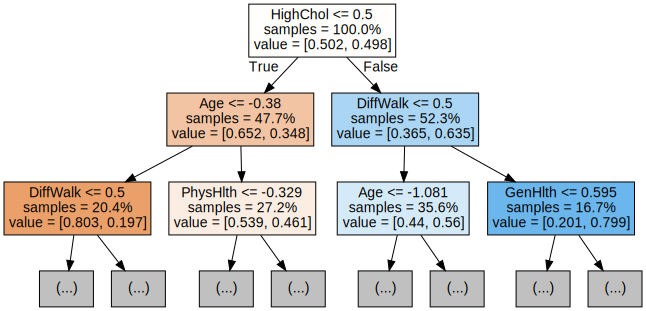

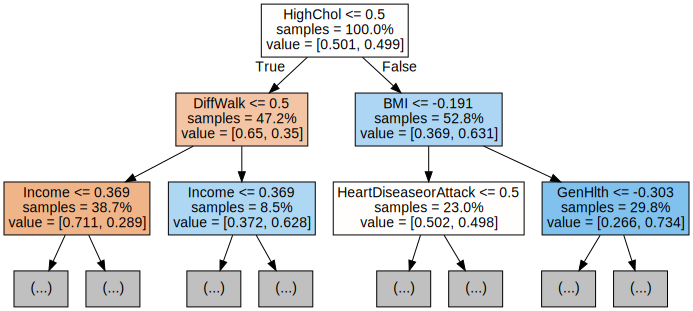

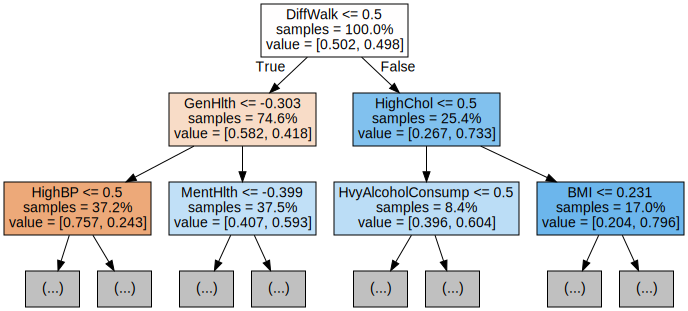

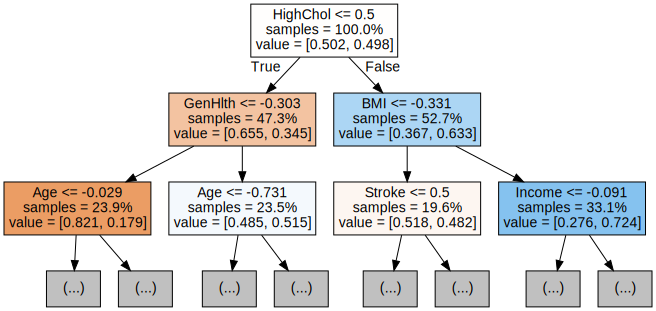

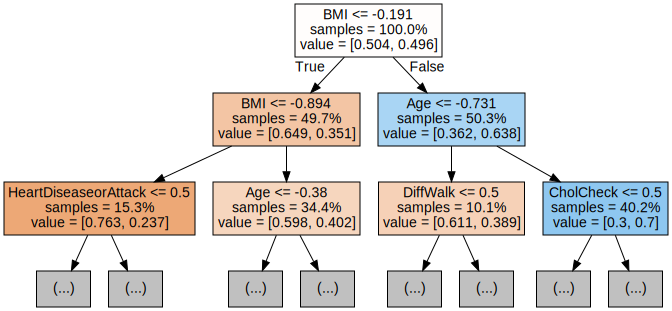

In [39]:
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names = x_train.columns,  
                               filled = True,  
                               max_depth = 2, 
                               impurity = False, 
                               proportion = True)
    graph = graphviz.Source(dot_data)
    display(graph)

### SVM

In [42]:
from sklearn import svm

m2 = svm.SVC(kernel = 'rbf')
m2.fit(x_train, y_train)
pred2 = m2.predict(x_test)

In [43]:
accuracy_score(y_test, pred2)

0.754903809883063

better than RF but not that significant